In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl 
import numpy as np
%matplotlib inline

In [6]:
df = pd.read_csv("FuelConsumptionCo2.csv")

In [7]:
df.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [8]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


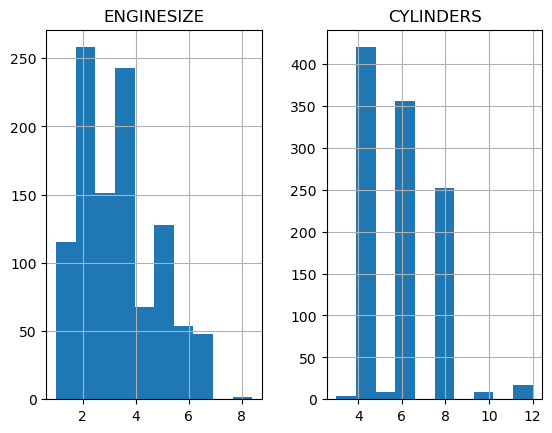

In [19]:
adf = df[['ENGINESIZE','CYLINDERS']]
adf.hist()
plt.show()

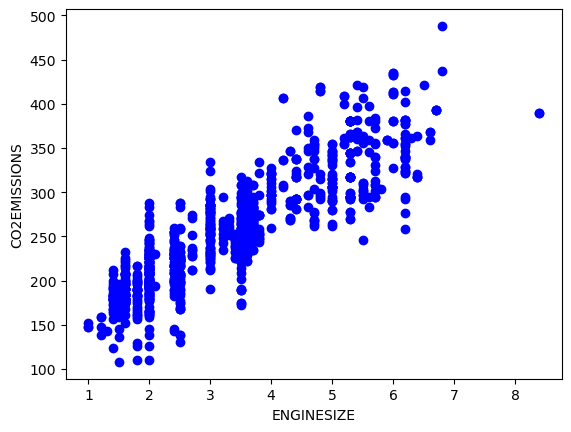

In [10]:
plt.scatter(adf.ENGINESIZE,adf.CO2EMISSIONS, color = 'blue')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

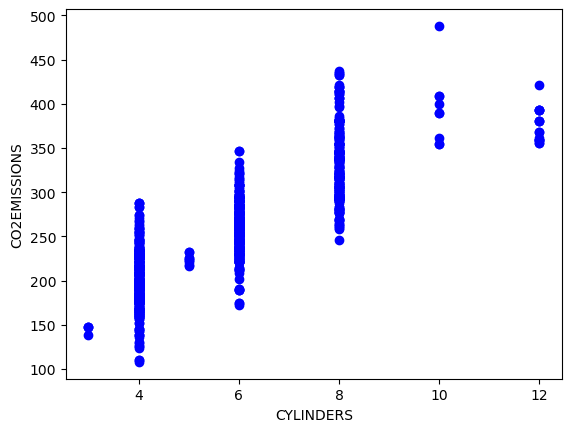

In [11]:
plt.scatter(adf.CYLINDERS,adf.CO2EMISSIONS, color = 'blue')
plt.xlabel("CYLINDERS")
plt.ylabel("CO2EMISSIONS")
plt.show()

Splitting and Training model

In [12]:
split_data = np.random.rand(len(df))<0.8
train =adf[split_data]
test = adf[~split_data]

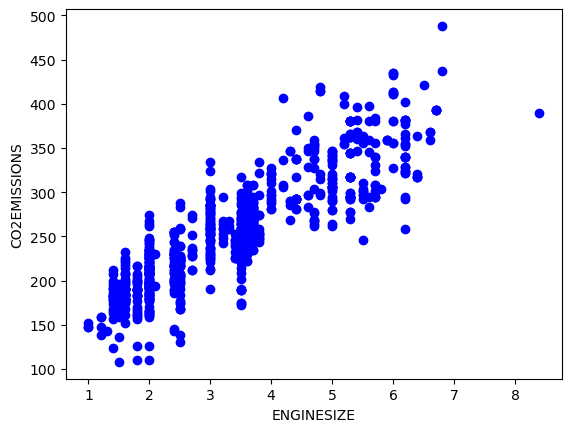

In [13]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color ='blue')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

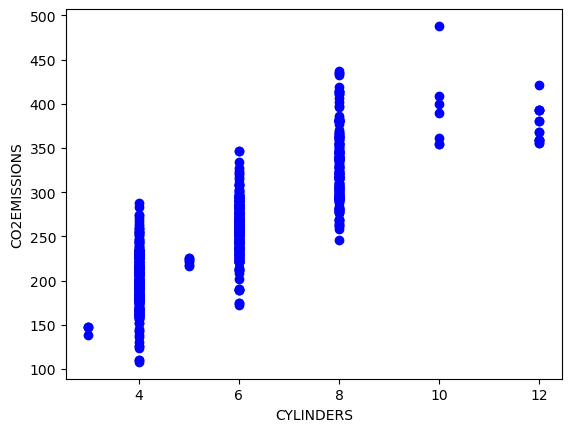

In [14]:
plt.scatter(train.CYLINDERS,train.CO2EMISSIONS,color ='blue')
plt.xlabel('CYLINDERS')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [15]:
from sklearn import linear_model
regression_model = linear_model.LinearRegression()
train_x = np.asanyarray(train[['CYLINDERS']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regression_model.fit(train_x,train_y)
print('coefficients ; ',regression_model.coef_)
print('intercept ; ',regression_model.intercept_)

coefficients ;  [[29.43730196]]
intercept ;  [84.63204232]


Text(0.5, 0, 'CYLINDERS')

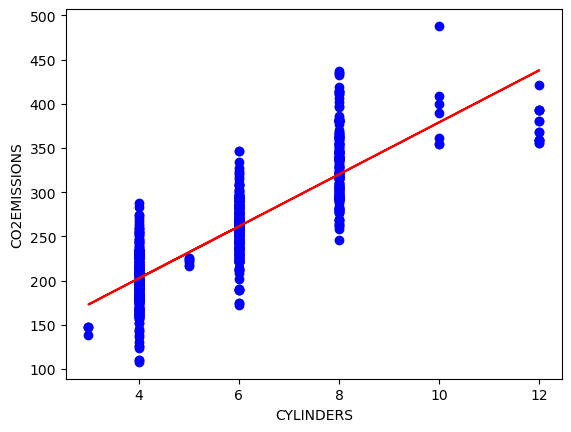

In [16]:
plt.scatter(train.CYLINDERS,train.CO2EMISSIONS,color = 'blue')
plt.plot(train_x,regression_model.coef_[0][0]*train_x + regression_model.intercept_[0],'-r' )
plt.ylabel("CO2EMISSIONS")
plt.xlabel('CYLINDERS')


In [17]:
from sklearn import linear_model
regression_model = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regression_model.fit(train_x,train_y)
print('coefficients ; ',regression_model.coef_)
print('intercept ; ',regression_model.intercept_)

coefficients ;  [[38.78325748]]
intercept ;  [125.54187794]


Text(0.5, 0, 'ENGINESIZE')

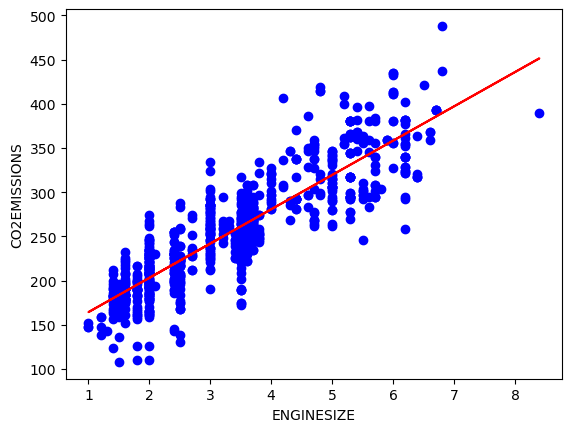

In [18]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color = 'blue')
plt.plot(train_x,regression_model.coef_[0][0]*train_x + regression_model.intercept_[0],'-r' )
plt.ylabel("CO2EMISSIONS")
plt.xlabel('ENGINESIZE')